<a href="https://colab.research.google.com/github/choderalab/assaytools2/blob/master/assaytools2/tests/benchmark_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Benchmark

The following benchmark test is conducted on google colab using single gpu

## imports and preparation

In [1]:
! git clone https://github.com/choderalab/assaytools2.git

Cloning into 'assaytools2'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 148 (delta 37), reused 51 (delta 18), pack-reused 68
Receiving objects: 100% (148/148), 457.88 KiB | 1.35 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [2]:
#imports
import sys
sys.path.append('assaytools2/assaytools2')
from titration_96 import *
import numpy
import random
import copy
import matplotlib
from matplotlib import pyplot as plt
import time


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



Prepare ligand, protein, and complex stock

In [0]:
ligand_stock = Solution(conc_l=1.0, d_conc_l=0.05)
protein_stock = Solution(conc_p=2.0, d_conc_p=0.01)
complex_stock = Solution(
        conc_l=1.0, d_conc_l=0.05,
        conc_p=2.0, d_conc_p=0.01)

prepare a 96-well plate

In [0]:
plate = Plate(96)

## define a random injection

In [0]:
def random_injection():
    """ randomly inject something into somewhere
    """
    global plate
    global ligand_stock, protein_stock, complex_stock
    
    # choose well idx
    well_idx = random.randint(0, 95)
    
    # choose solution
    solution = random.choice([ligand_stock, protein_stock, complex_stock])
    
    # choose a reasonable volumn
    vol = random.random() * 5.0
    
    # choose a reasonable uncertainty associated with volumn
    d_vol = random.random() * 0.5
    
    plate.inject(solution, well_idx, vol, d_vol)
    

## visulize a bit

In [0]:
def visulize(plate):
    plt.axis('off')
    plt.figure(figsize=(20, 20))
    
    # vols
    plt.subplot(411)
    plt.imshow(plate.vols.numpy().transpose(), cmap='inferno', 
            norm=matplotlib.colors.Normalize(0, 1))
    plt.title('vols')
    
    # concs
    plt.subplot(412)
    plt.imshow(plate.concs.numpy()[:, 0, :].transpose(), cmap='inferno', 
               norm=matplotlib.colors.Normalize(0, 1))
    plt.title('concs_p')
    
    plt.subplot(413)
    plt.imshow(plate.concs.numpy()[:, 0, :].transpose(), cmap='inferno', 
               norm=matplotlib.colors.Normalize(0, 1))
    plt.title('concs_l')
    
    plt.subplot(414)
    plt.imshow(plate.concs.numpy()[:, 0, :].transpose(), cmap='inferno', 
               norm=matplotlib.colors.Normalize(0, 1))
    plt.title('concs_r')

In [7]:
for idx in range(1000):
    random_injection()
plate.sample()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


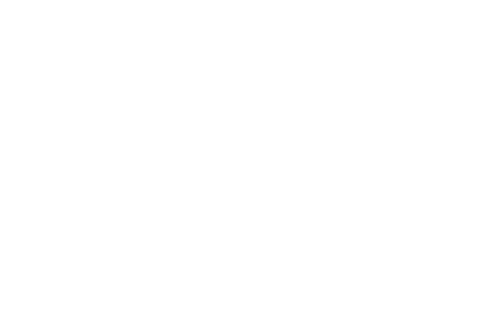

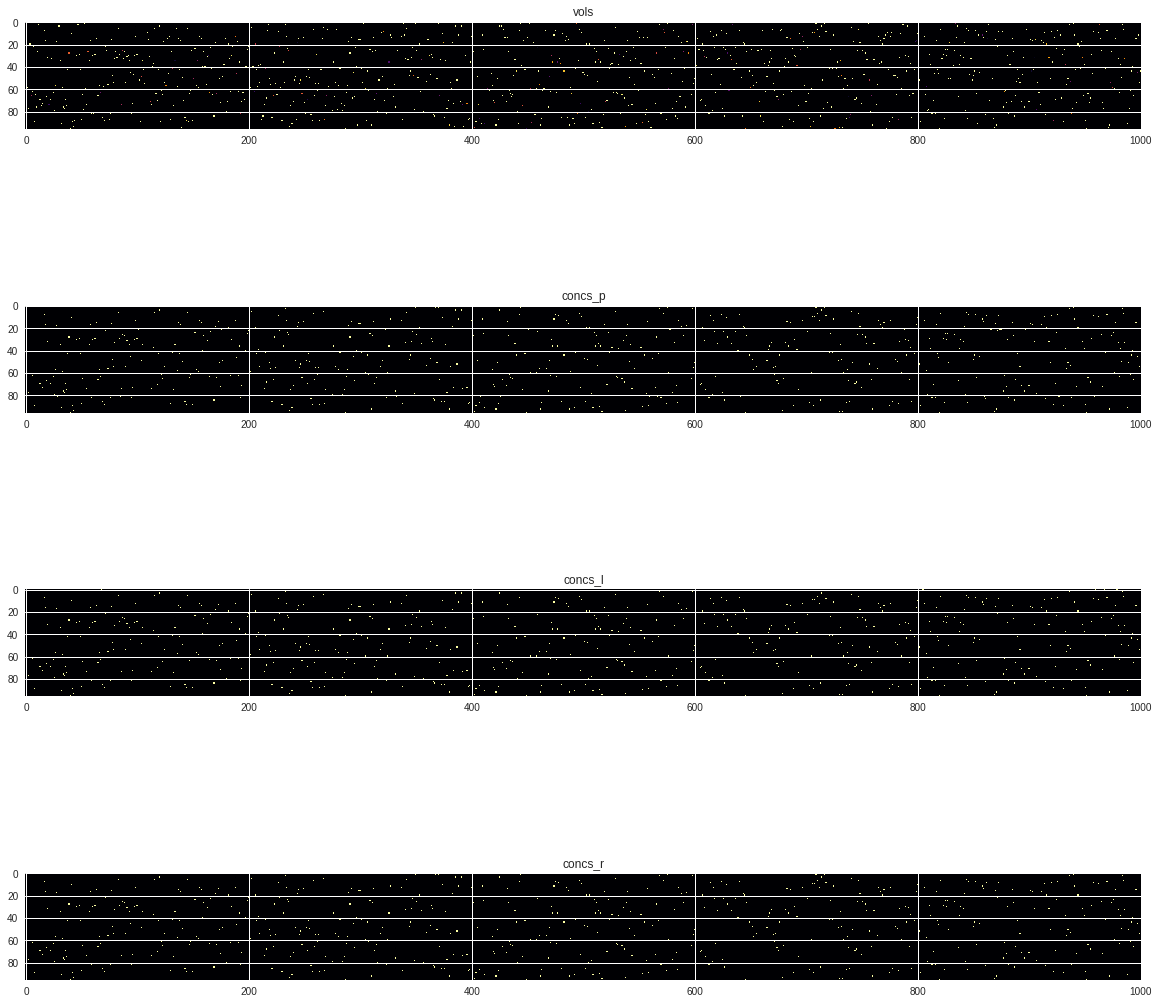

In [8]:
visulize(plate)

## benchmark

In [12]:
n_injections_array = [1, 10, 100, 1000]
sample_time = []
for n_injections in n_injections_array:
    plate = Plate(96)
    time0 = time.time()
    for dummy_idx in range(n_injections):
        random_injection()
    time1 = time.time()
    plate.sample()
    time2 = time.time()
    sample_time.append(time2 - time1)
    print("%s injections takes %s, sampling takes %s" %\
          (n_injections, time1 - time0, time2 - time1))

1 injections takes 0.013467550277709961, sampling takes 0.19350171089172363
10 injections takes 0.11129617691040039, sampling takes 0.19648480415344238
100 injections takes 1.103825330734253, sampling takes 0.1985023021697998
1000 injections takes 11.128419160842896, sampling takes 0.8406789302825928
